# KMNIST

* Dataset

`Kuzushiji-MNIST` is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in the original MNIST format as well as a NumPy format. Since MNIST restricts us to 10 classes, we chose one character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST.

**ref link** :

- https://docs.pytorch.org/vision/main/generated/torchvision.datasets.KMNIST.html#torchvision.datasets.KMNIST

- https://github.com/rois-codh/kmnist

In [1]:
import requests
from pathlib import Path


# Download helper functions from learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

from timeit import default_timer as timer
from tqdm.auto import tqdm

from helper_functions import accuracy_fn

In [3]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
# getting the KMNIST dataset
train_data = datasets.KMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.KMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 18.2M/18.2M [00:20<00:00, 884kB/s] 
100%|██████████| 29.5k/29.5k [00:00<00:00, 318kB/s]
100%|██████████| 3.04M/3.04M [00:01<00:00, 1.61MB/s]
100%|██████████| 5.12k/5.12k [00:00<00:00, 9.86MB/s]


In [5]:
# info on dataset
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.4627, 1.0000, 1.0000, 0.4863, 0.0039,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1412, 0.9333, 1.0000, 0.5725, 0.0078, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0471, 0.7961, 1.0000, 0.8627, 0.0549, 0.0000, 0.0000,
           0.0000, 0.0431, 0.5176, 0.3725, 0.7333, 0.3725, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.5843, 1.0000, 0.9843, 0.2588, 0.0000, 0.0000, 0.0000,
           0.0275, 0.6588, 0.5333, 0.0392, 

In [7]:
# classnames [syllable]
class_names = train_data.classes
class_names

['o', 'ki', 'su', 'tsu', 'na', 'ha', 'ma', 'ya', 're', 'wo']

In [8]:
# classnames with their index
class_to_idx = train_data.class_to_idx
class_to_idx

{'o': 0,
 'ki': 1,
 'su': 2,
 'tsu': 3,
 'na': 4,
 'ha': 5,
 'ma': 6,
 'ya': 7,
 're': 8,
 'wo': 9}

In [9]:
train_data.targets, len(train_data.targets)

(tensor([8, 7, 0,  ..., 0, 4, 9]), 60000)

In [10]:
# check the image shape and label
image.shape, label, class_names[label]

(torch.Size([1, 28, 28]), 8, 're')

In [11]:
## Visualizing our data

image shape: torch.Size([1, 28, 28])



(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

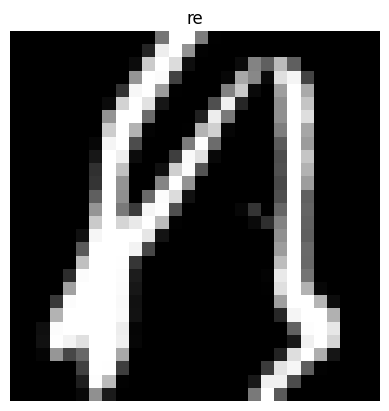

In [12]:
print(f"image shape: {image.shape}\n")

plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

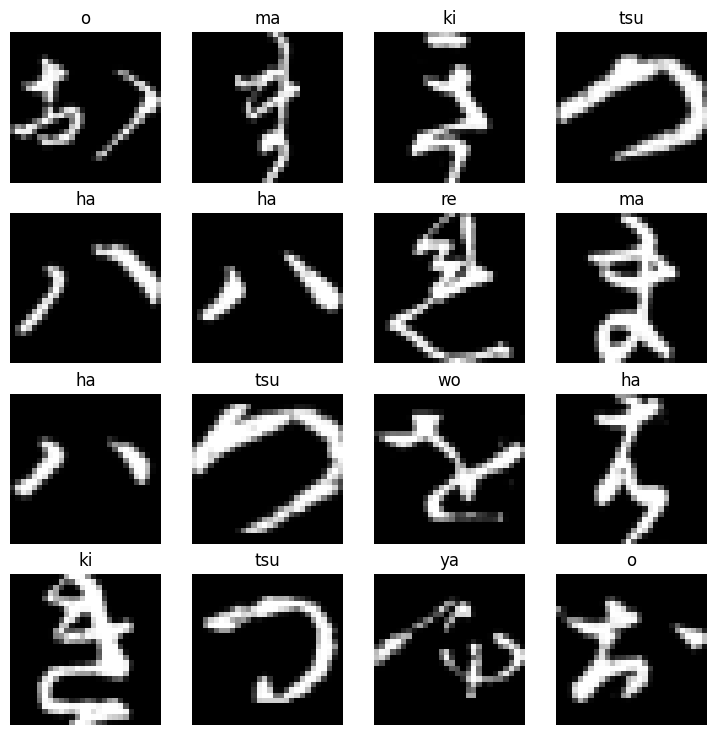

In [13]:
# plot more
fig = plt.figure(figsize = (9, 9))
nrows, ncols = 4, 4
for i in range(1, nrows * ncols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(nrows, ncols, i)
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

In [14]:
# turn our dataset into Python iterable

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True,
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

In [15]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e6b0c4e2150>,
 <torch.utils.data.dataloader.DataLoader at 0x7e6bffdfde80>)

In [16]:
len(train_dataloader), len(test_dataloader) # batches of specified batch 32

(1875, 313)

Text(0.5, 1.0, 'o')

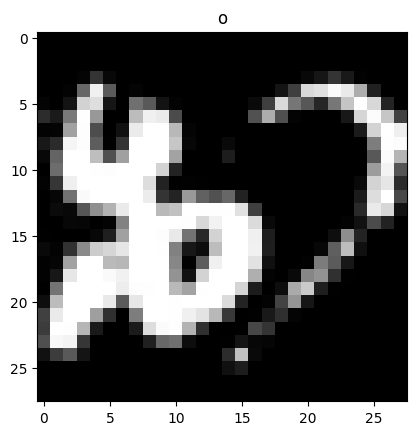

In [17]:
img, label = next(iter(train_dataloader))

plt.imshow(img[0].squeeze(), cmap = "gray")
plt.title(class_names[label[0]])

In [18]:
# building baseline model

class KMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [19]:
model_0 = KMNISTModelV0(input_shape = 28 * 28,
                        hidden_units = 10,
                        output_shape = len(class_names)).to(device)

In [20]:
model_0

KMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
next(model_0.parameters())

Parameter containing:
tensor([[-1.8797e-03,  2.2278e-02,  1.1096e-02,  ..., -2.1392e-03,
          4.4699e-03,  1.8658e-02],
        [ 3.3430e-02,  1.9737e-02,  5.4573e-04,  ..., -5.9621e-03,
         -1.0588e-02,  1.3295e-02],
        [-3.3856e-02,  2.7816e-02, -2.6325e-02,  ...,  6.5746e-03,
         -3.4221e-02, -3.2818e-02],
        ...,
        [ 1.8188e-02, -1.6218e-02,  4.1906e-05,  ..., -2.7088e-02,
          4.3172e-03,  3.2129e-02],
        [ 5.5684e-03,  5.8150e-03,  1.3936e-02,  ..., -7.3836e-03,
          5.8452e-03,  1.4422e-02],
        [ 1.7732e-02, -1.0941e-02,  1.5868e-02,  ...,  7.3223e-03,
          1.6704e-02, -1.9353e-02]], device='cuda:0', requires_grad=True)

In [22]:
# setup loss, optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [23]:
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [24]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0, 0

  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim = 1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train loss: {train_loss: .5f} | Train accuracy: {train_acc: .5f}%")

In [25]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      loss = loss_fn(test_pred, y)
      test_loss += loss
      test_acc += accuracy_fn(y_true = y,
                              y_pred = test_pred.argmax(dim = 1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test loss: {test_loss: .5f} | Test accuracy: {test_acc: .5f}%")

In [26]:
train_start_time_on_device = timer()

EPOCHS = 3

for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch: {epoch}\n-----------")
  train_step(
      model = model_0,
      dataloader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn,
  )
  test_step(
      model = model_0,
      dataloader = test_dataloader,
      loss_fn = loss_fn,
      accuracy_fn = accuracy_fn
  )

train_end_time_on_device = timer()
training_total_time = print_train_time(start = train_start_time_on_device,
                                       end = train_end_time_on_device,
                                       device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss:  0.72533 | Train accuracy:  78.38667%
Test loss:  1.05835 | Test accuracy:  68.93970%
Epoch: 1
-----------
Train loss:  0.62504 | Train accuracy:  81.22000%
Test loss:  1.07197 | Test accuracy:  68.51038%
Epoch: 2
-----------
Train loss:  0.61220 | Train accuracy:  81.67667%
Test loss:  1.09799 | Test accuracy:  67.46206%
Train time on cuda:  29.978 seconds


In [27]:
def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  ''' returns a dictionary containing the results of model predicting on dataloader '''
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(dataloader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(dataloader)
    acc /= len(dataloader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [28]:
model_0_results = eval_model(model = model_0,
                            dataloader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'KMNISTModelV0',
 'model_loss': 1.09799325466156,
 'model_acc': 67.4620607028754}

In [29]:
# model 1

class KMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [30]:
model_1 = KMNISTModelV1(input_shape = 28 * 28,
                        hidden_units = 10,
                        output_shape = len(class_names)).to(device)
model_1

KMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [33]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

train_start_time_on_device = timer()

EPOCHS = 5

for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch: {epoch}\n----------")
  train_step(
      model = model_1,
      dataloader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn
  )
  test_step(
      model = model_1,
      dataloader = test_dataloader,
      loss_fn = loss_fn,
      accuracy_fn = accuracy_fn
  )

train_end_time_on_device = timer()
training_total_time = print_train_time(
    start = train_start_time_on_device,
  end = train_start_time_on_device,
  device = device
)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss:  0.94856 | Train accuracy:  71.65000%
Test loss:  1.24523 | Test accuracy:  61.82109%
Epoch: 1
----------
Train loss:  0.71052 | Train accuracy:  78.76833%
Test loss:  1.12382 | Test accuracy:  65.34545%
Epoch: 2
----------
Train loss:  0.62348 | Train accuracy:  81.41500%
Test loss:  1.06784 | Test accuracy:  66.95288%
Epoch: 3
----------
Train loss:  0.57753 | Train accuracy:  82.70000%
Test loss:  1.01681 | Test accuracy:  69.44888%
Epoch: 4
----------
Train loss:  0.54863 | Train accuracy:  83.43500%
Test loss:  0.98661 | Test accuracy:  70.25759%
Train time on cuda:  0.000 seconds


In [34]:
model_1_results = eval_model(model = model_1,
                            dataloader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'KMNISTModelV1',
 'model_loss': 0.9866064786911011,
 'model_acc': 70.25758785942492}

In [83]:
# model 2

class KMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 14 * 14,
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block(x)
    #print(f"conv block: {x.shape}")
    x = self.classifier(x)
    return x

In [84]:
model_2 = KMNISTModelV2(input_shape = 1, # color channels
                        hidden_units = 10,
                        output_shape = len(class_names)).to(device)
model_2

KMNISTModelV2(
  (conv_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1960, out_features=10, bias=True)
  )
)

In [85]:
model_2(torch.randn(size = (32, 1, 28, 28)).to(device))

tensor([[-2.6035e-02, -1.8840e-01, -2.4178e-01,  7.9181e-03, -1.9834e-01,
         -8.8965e-03, -1.3492e-01, -1.3434e-01,  1.6797e-02,  6.6711e-02],
        [ 5.4649e-02, -3.0103e-02, -2.2141e-01,  3.0215e-02, -2.0085e-01,
          2.4136e-02, -8.8905e-02,  1.5205e-02,  1.7450e-01,  1.1524e-01],
        [-3.7661e-02,  7.4947e-02, -3.3536e-02, -5.9118e-02, -1.9893e-01,
          2.4594e-04, -1.5599e-01,  1.3092e-01,  2.8247e-01,  2.1248e-01],
        [-1.5819e-01, -1.2924e-01, -8.3165e-02,  8.5165e-03, -1.9569e-01,
         -5.7814e-02, -2.2855e-01,  3.5266e-02,  1.3895e-01,  1.1589e-01],
        [-1.6212e-02, -1.5222e-02, -1.4487e-01,  1.2670e-02, -1.3326e-01,
         -6.0574e-02, -1.1492e-01, -1.3686e-01,  1.4710e-01,  1.2091e-01],
        [-1.7661e-01,  3.6653e-02, -2.0308e-01, -1.5812e-02, -8.1774e-02,
         -1.0366e-01, -1.2830e-01, -9.2637e-02,  3.2373e-01,  1.2333e-01],
        [-6.5256e-02,  1.0123e-01, -3.2062e-02, -1.7886e-02, -1.7003e-01,
         -1.7766e-01, -2.2306e-0

In [86]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [87]:
train_start_time_on_device = timer()

EPOCHS = 25

for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch: {epoch}\n----------")
  train_step(
      model = model_2,
      dataloader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn
  )
  test_step(
      model = model_2,
      dataloader = test_dataloader,
      loss_fn = loss_fn,
      accuracy_fn = accuracy_fn
  )

train_end_time_on_device = timer()
training_total_time = print_train_time(
    start = train_start_time_on_device,
  end = train_start_time_on_device,
  device = device
)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss:  0.76827 | Train accuracy:  76.67000%
Test loss:  1.06463 | Test accuracy:  67.53195%
Epoch: 1
----------
Train loss:  0.55037 | Train accuracy:  83.49333%
Test loss:  0.82744 | Test accuracy:  73.83187%
Epoch: 2
----------
Train loss:  0.37494 | Train accuracy:  89.04333%
Test loss:  0.64940 | Test accuracy:  79.68251%
Epoch: 3
----------
Train loss:  0.28483 | Train accuracy:  91.58000%
Test loss:  0.58931 | Test accuracy:  82.00879%
Epoch: 4
----------
Train loss:  0.23702 | Train accuracy:  93.00167%
Test loss:  0.53609 | Test accuracy:  83.62620%
Epoch: 5
----------
Train loss:  0.21115 | Train accuracy:  93.71000%
Test loss:  0.47775 | Test accuracy:  85.80272%
Epoch: 6
----------
Train loss:  0.19394 | Train accuracy:  94.20667%
Test loss:  0.48124 | Test accuracy:  85.85264%
Epoch: 7
----------
Train loss:  0.18189 | Train accuracy:  94.61167%
Test loss:  0.47213 | Test accuracy:  86.32188%
Epoch: 8
----------
Train loss:  0.17225 | Train accurac

In [88]:
model_2_results = eval_model(model = model_2,
                            dataloader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'KMNISTModelV2',
 'model_loss': 0.42525434494018555,
 'model_acc': 88.64816293929712}

In [89]:
# model 2

class KMNISTModelV3(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7,
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"conv block 2: {x.shape}")
    x = self.classifier(x)
    return x

In [90]:
model_3 = KMNISTModelV3(input_shape = 1, # color channels
                        hidden_units = 10,
                        output_shape = len(class_names)).to(device)
model_3

KMNISTModelV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [93]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.01)

In [95]:
time_start_on_device = timer()

EPOCHS = 28

for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model = model_3,
             dataloader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)
  test_step(model = model_3,
            dataloader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

time_end_on_device = timer()
total_training_time = print_train_time(start = time_start_on_device,
                                       end = time_end_on_device,
                                       device = device)

  0%|          | 0/28 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss:  0.07534 | Train accuracy:  97.63667%
Test loss:  0.40178 | Test accuracy:  90.21565%
Epoch: 1
----------
Train loss:  0.07462 | Train accuracy:  97.65333%
Test loss:  0.35378 | Test accuracy:  91.46366%
Epoch: 2
----------
Train loss:  0.07300 | Train accuracy:  97.74833%
Test loss:  0.37555 | Test accuracy:  91.07428%
Epoch: 3
----------
Train loss:  0.07288 | Train accuracy:  97.76167%
Test loss:  0.36561 | Test accuracy:  91.24401%
Epoch: 4
----------
Train loss:  0.07107 | Train accuracy:  97.77167%
Test loss:  0.38571 | Test accuracy:  90.91454%
Epoch: 5
----------
Train loss:  0.07041 | Train accuracy:  97.84333%
Test loss:  0.38922 | Test accuracy:  90.22564%
Epoch: 6
----------
Train loss:  0.06937 | Train accuracy:  97.77833%
Test loss:  0.35546 | Test accuracy:  91.50359%
Epoch: 7
----------
Train loss:  0.06845 | Train accuracy:  97.87167%
Test loss:  0.36997 | Test accuracy:  91.29393%
Epoch: 8
----------
Train loss:  0.06796 | Train accurac

In [97]:
model_3_results = eval_model(model = model_3,
                            dataloader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_3_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'KMNISTModelV3',
 'model_loss': 0.39207524061203003,
 'model_acc': 91.46365814696486}

In [101]:
# compare model result
import pandas as pd

compare_results = pd.DataFrame(data = [model_0_results,
                                       model_1_results,
                                       model_2_results,
                                       model_3_results])
compare_results

,model_name,model_loss,model_acc
0,KMNISTModelV0,1.097993,67.462061
1,KMNISTModelV1,0.986606,70.257588
2,KMNISTModelV2,0.425254,88.648163
3,KMNISTModelV3,0.392075,91.463658


MODEL 0: Baseline model (linear model) with lr = 0.1
MODEL 1: Baseline model extension (linear and non-linear model) with lr = 0.01
MODEL 2: Convolutional model with one convolutional block and lr = 0.01
MODEL 3: Convolutional model with two convolutional block and lr = 0.001



Text(0, 0.5, 'Model')

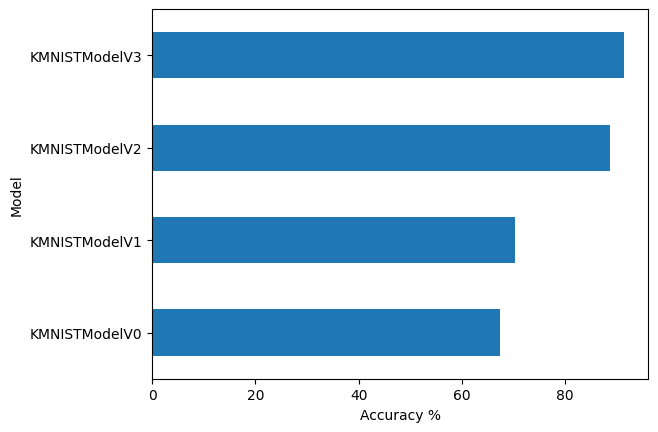

In [103]:
# visualize our model results

print("MODEL 0: Baseline model (linear model) with lr = 0.1")
print("MODEL 1: Baseline model extension (linear and non-linear model) with lr = 0.01")
print("MODEL 2: Convolutional model with one convolutional block and lr = 0.01")
print("MODEL 3: Convolutional model with two convolutional block and lr = 0.001\n")
compare_results.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("Accuracy %")
plt.ylabel("Model")

In [117]:
max = compare_results["model_acc"].max()
max_idx = compare_results["model_acc"].idxmax()
max_model_name = compare_results["model_name"][max_idx]

# model chosen
model = f"model_{max_idx}"
model

'model_3'

In [123]:
# prediction
test_samples = []
label_samples = []
sample_size = 6
for i in range(sample_size):
  random_idx = torch.randint(0, len(test_data), size = [1]).item()
  test_samples.append(test_data[random_idx][0])
  label_samples.append(test_data[random_idx][1])

In [124]:
len(test_samples)

6

In [125]:
label_samples

[7, 5, 2, 5, 7, 1]

In [126]:
def predict_and_plot(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = sample.unsqueeze(dim = 0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_probs.append(pred_prob.cpu())

  pred_probs = torch.stack(pred_probs)

  plt.figure(figsize = (9, 9))
  nrows, ncols = 2, 3
  for i, image in enumerate(data):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(image.squeeze(), cmap = "gray")
    if torch.argmax(pred_probs[i]) == label_samples[i]:
      plt.title(class_names[label_samples[i]], color = "green")
    else:
      plt.title(class_names[label_samples[i]], color = "red")
    plt.axis(False)

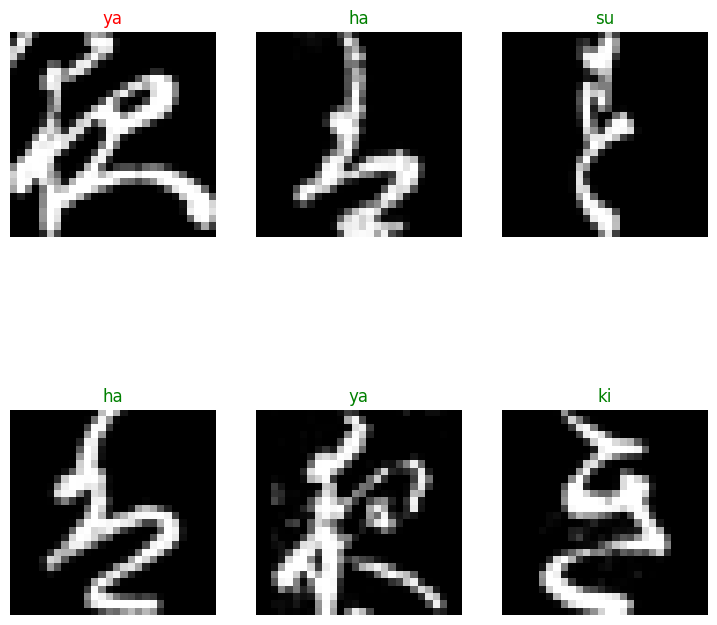

In [127]:
pred = predict_and_plot(
          model = model_3,
          data = test_samples,
          device = device
      )
pred